In [1]:
#all my fave imports in case I need them later
import numpy as np
from scipy.optimize import *
from scipy.integrate import *
import matplotlib.pyplot as plt
import math
import warnings
warnings.filterwarnings('ignore') #living dangerously

### Problem 1A.)

From the attatched notes (avaliable as `problem1_referenceNotes`), we obtain the following mass balance equations: 

$ \frac{\partial N_1}{\partial t} = F(D_2) - \gamma_N N_1  \hspace{10mm} (A)$

 

$ \frac{\partial D_1}{\partial t} = G(N_1)-\gamma_D D_1 \hspace{10mm} (B)$


 
$ \frac{\partial N_2}{\partial t} = F(D_1) - \gamma_N N_2 \hspace{10mm} (C)$


 
$ \frac{\partial D_2}{\partial t} = G(N_2)- \gamma_D D_2 \hspace{10mm} (D) $

From here, we use the quantities $v=\gamma_D / \gamma_N$, and $\tau= \gamma_D t$ to make the equations dimensionless.  This yields:

$$ \frac{\partial N_1}{\partial \tau} = (f(D_2) - N_1)\frac{1}{v}  \hspace{10mm} (A1)$$

$$ \frac{\partial D_1}{\partial \tau} = g(N_1)-D_1 \hspace{10mm} (B1)$$

$$ \frac{\partial N_2}{\partial \tau} = (f(D_1) - N_2)\frac{1}{v} \hspace{10mm} (C1)$$

$$ \frac{\partial D_2}{\partial \tau} = g(N_2)-D_2 \hspace{10mm} (D1) $$

Where $f(D)= F(D)/ \gamma_N$ and $g(N)=G(n)/\gamma_D$ are experimentally derived (Sprinzale, Nature 2010).  Note that a schematic drawing as well as sketches of f(D) and g(N) are avaliable for reference in the notes.

Now, consider the limit $v=\gamma_D / \gamma_N <<1$ (or $\gamma_D << \gamma_N$).

Rearrainging the $v$ to the right hand side of (A1) and (C1) causese the right hand side to go to zero, yielding:

$$ f(D_2)=N_1$$

$$ f(D_1)=N_2 $$

(in the aforementioned limiting case).  This demonstrates that the system quickly settles into a steady state.

Next, these equalities are substituted into (B1) and (D1), producing (B2) and (D2) as the desired dynamical equations for the evolution of Delta:

$$ \frac{\partial D_1}{\partial \tau} = g(f(D_2))-D_1 \hspace{10mm} (B2)$$

$$ \frac{\partial D_2}{\partial \tau} = g(f(D_1))-D_2 \hspace{10mm} (D2) $$


### Problem 1B.)

From here, the substitutions for experimentally obtained f(D) and g(N) (sprinzale, Nature 2010) are used.  This results in the following system:  

$$ \frac{\partial D_1}{\partial \tau} = \frac{1}{1+10(\frac{D_2^2}{0.1+D_2^2})^2}   -D_1 \hspace{10mm} (B2-i)$$

$$ \frac{\partial D_2}{\partial \tau} = \frac{1}{1+10(\frac{D_1^2}{0.1+D_1^2})^2}   -D_2 \hspace{10mm} (D2-i) $$

The nullclines of the system are solved for and plotted below:

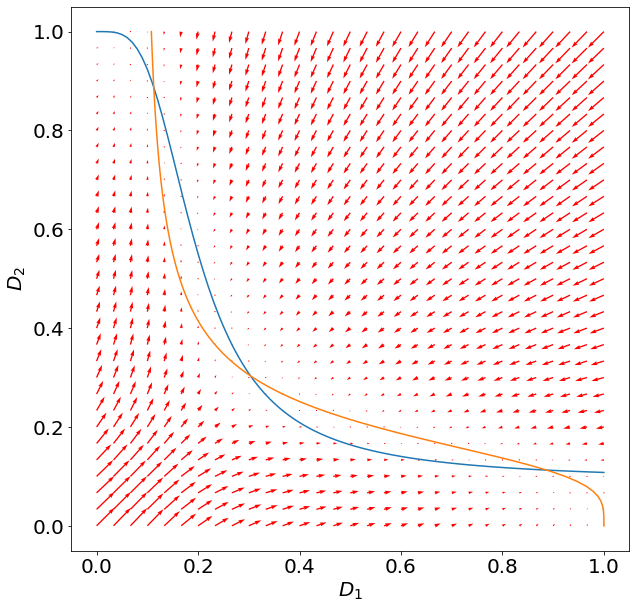

In [2]:
def nullclines(w):
    """
    Defines the coupled equations of the aforementioned system
    Arguments:
        w: vector of state variables
            w=[d1,d2]
    """
    
    d1,d2=w
    
    arg1=1/(1+10*np.power(np.power(d2,2)/(0.1+np.power(d2,2)),2))-d1
    arg2=1/(1+10*np.power(np.power(d1,2)/(0.1+np.power(d1,2)),2))-d2
    return [arg1,arg2]

#generate phase plot
n=31
d1Vector=np.linspace(0,1,n)
d2Vector=np.linspace(0,1,n)
#generate mesh
meshD1,meshD2=np.meshgrid(d1Vector,d2Vector)
dD1dt,dD2dt=np.zeros(meshD1.shape),np.zeros(meshD2.shape)
#iterate through values of Ca, Cr
for i in range(n):
    for j in range(n):
        localD1=meshD1[i,j]
        localD2=meshD2[i,j]
        deriv=nullclines([localD1,localD2])
        dD1dt[i,j]=deriv[0]
        dD2dt[i,j]=deriv[1]
        
#generate nullclines
trace=np.linspace(0,1,101)
null2=1/(1+10*np.power(np.power(trace,2)/(0.1+np.power(trace,2)),2))

#plotting        
plt.rcParams["figure.figsize"] = (10,10) 
plt.rcParams.update({'font.size': 20})
Q=plt.quiver(meshD1,meshD2,dD1dt,dD2dt,color='r');
plt.plot(trace,null2);
plt.plot(null2,trace);
plt.xlabel('$D_1$')
plt.ylabel('$D_2$')

plt.show()

Similarly to in the aforementioned notes, we can see that there are three steady states.  Moving from left to right we find that the first and third steady states are stable while the central one is unstable.  This can be done by inspection in this case, or mathematically by noting the effect of small pertubations on the system.  As mentioned in class, the cell with the higher delta concentration will take on the primary fate.  Over long time, the system will always settle into one of these two states, and even if random actions cause the system to momentarily deviate, the stability of the system ensures the values are returned to.